In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [2]:
train_features = train_df.iloc[:,train_df.columns != 'label']
train_labels = train_df.iloc[:,train_df.columns == 'label']
train_labels = train_labels.values.reshape(-1)

test_features = test_df.iloc[:,test_df.columns != 'label']
test_labels = test_df.iloc[:,test_df.columns == 'label']
test_labels = test_labels.values.reshape(-1)

In [3]:
test_labels.shape

(7172,)

In [4]:
def pretty_print(image_example):
    """ Pretty prints a Fashion MNIST example.

    Parameters:
        image_example: a 1x784 numpy array corresponding to the features of
                       a single image.

    Returns:
        None.
    """
    print(np.array_str(image_example, precision=1, max_line_width=116))


Dimensions of training set feature matrix: (27455, 784)
Dimensions of training set label matrix: (27455,)
[ 82  93 107 120 125 131 135 140 143 146 148 151 155 156 158 161 162 163 165 168 169 170 171 172 172 174 174 174
  84  95 109 120 125 132 137 140 145 148 151 153 156 157 161 161 163 165 168 169 170 172 172 173 173 175 175 176
  87  96 110 123 128 134 139 143 146 150 153 155 157 160 163 163 165 169 169 171 171 172 174 175 177 177 178 177
  88  98 114 124 129 135 139 144 146 151 154 156 159 162 163 165 167 169 170 172 176 176 176 177 177 178 179 178
  90 101 116 125 130 136 141 145 148 152 153 156 160 161 164 166 167 170 173 170 136 171 180 179 179 180 180 181
  90 102 117 126 131 137 143 147 149 153 155 158 162 163 165 167 168 171 174 183 105 145 187 179 180 181 182 183
  91 103 118 125 132 139 144 148 151 154 156 160 162 166 168 169 171 170 179 186 102 142 189 181 182 183 185 185
  94 106 120 127 133 139 143 147 153 155 157 161 163 165 168 170 173 170 191 171  89 162 188 183 185 18

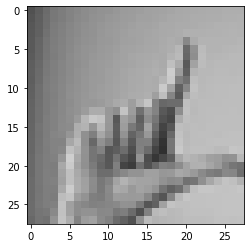

In [5]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

print("Dimensions of training set feature matrix:", train_features.shape)
print("Dimensions of training set label matrix:", train_labels.shape)

EXAMPLE_INDEX = np.random.randint(27455)
pretty_print(train_features.iloc[EXAMPLE_INDEX].values)

plt.figure()
plt.imshow(train_features.iloc[EXAMPLE_INDEX].values.reshape(28,28),cmap='gray', vmin=0, vmax=255)
plt.show()



In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

s_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components = 0.95)),
        ('knn', KNeighborsClassifier())
    ])

s_param_grid = {'knn__n_neighbors': [1,3,5,7,9,11],
              'knn__p': [1,2], 
              'knn__weights': ['uniform','distance']}

sknn = GridSearchCV(s_pipeline, s_param_grid, cv=5, n_jobs = -1)
sknn.fit(train_features, train_labels)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 9, 11],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']})

In [7]:
sknn.score(test_features,test_labels)

0.8443948689347462

In [10]:
sknn.best_score_

1.0

In [9]:
from sklearn.metrics import f1_score
f1_score(test_labels, sknn.predict(test_features), average='weighted')

0.8465596792274542

In [8]:
sknn.best_params_

{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}

In [ ]:
#knn: 0.8465596792274542
#{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}